# Import all necessary library

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yaml

In [13]:
config_path = "../config/config.yaml"

def load_config():

    '''
    this function is to load config file
    '''

    try:

        with open(config_path, "r") as f:

            config = yaml.safe_load(f)

    except FileNotFoundError:

        return "Config file not found!"

    return config

# Data Collection

Dataset House-Price sudah terbagi menjadi set Training dan set Testing. Pada course ini, hanya digunakan set Training saja.

## Ambil alamat penyimpanan file dataset dari file config yang sudah didefinisikan

In [19]:
# load config file that contains raw dataset path
config = load_config()

# grab raw dataset path
raw_path = config["raw_dataset_path"]

## Load dataset

In [20]:
# remember this dataset is alrady splitted. we only load the train set
train = pd.read_csv(raw_path)

# print header of dataframe
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Data Exploration and Handling

## Missing Value

### Check Missing Value

In [21]:
# sum all missing value in dataset and keep only columns with missing value > 0
missing = train.isnull().sum()[train.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_train = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(train)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missing value information
missing_train

,NaN_count,NaN_percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


Berdasarkan sumber data asli (baca: [house_price_source](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)), setiap kolom pada data telah didefinisikan. Sehingga, berdasarkan definisi tersebut, terdapat beberapa kolom yang nilai NA (*missing value*) sebenarnya bukan *missing value* melainkan memiliki arti **Tidak ada** (selanjutnya disebut *legit NA*)

Berdasarkan sumber tersebut, informasi terkait NA yang dikumpulkan adalah sebagai berikut:

* NA value in "PoolQC" column means **no pool**. It doesn't mean **missing value**

* NA value in "MiscFeature" column means **no additional house feature**. It doesn't mean **missing value**

* NA value in "Alley" column means **no alley connected to house**. It doesn't mean **missing value**

* NA value in "Fence" column means **the house has no fence**. It doesn't mean **missing value**

* NA value in "Fireplaces" column means **the house has no fireplace**. It doesn't mean **missing value**

* NA value in "FireplaceQu" column means **No Fire Place**. It doesn't mean **missing value**

* no explanation about NA value for "LotFrontage". Thus, we enact this as **missing value**

* NA value in "GarageType" column means **the house has no garage**. It doesn't mean **missing value**

* since the house with **no garage** would also has no information about "GarageFinish", "GarageYrBlt, "GarageQual", and "GarageCond", the NA value should not considered as **missing value**.

* NA value in "BsmtQual", "BsmtFinType2", "BsmtinType1", "BsmtCond", and "BsmtExposure" columns means **the house has no garage**. It doesn't mean **missing value**.

* NA value in "MasVnrType" and "VasVnrArea" columns means **the house has no masonry veneer**. It doesn't mean **missing value**

* no explanation about NA value for "Electrical". Thus, we enact this as **missing value**

sehingga, penanganan nilai NA pada kolom *legit NA* akan berbeda dengan kolom NA *missing value*

### Missing Value Handling

berdasarkan informasi di atas, ambil kolom-kolim *legit NA* agar dapat ditangani

In [23]:
# specify columns with legit na values
legit_na_values_columns = ["MasVnrArea", "MasVnrType", "BsmtExposure", "BsmtCond", "BsmtFinType1", 
                          "BsmtFinType2", "BsmtQual", "GarageCond", "GarageQual", 
                          "GarageFinish", "GarageType", "Fireplaces", "Fence", "Alley", "MiscFeature", 
                          "PoolQC", "GarageYrBlt", "FireplaceQu"]

# print how many columns with legit na values
print(f'number of columns with legit NA values: {len(legit_na_values_columns)}')

number of columns with legit NA values: 18


untuk mengetahui metode penanganan yang tepat, kita harus memisahkan kolom dengan tipe data numerik dan tipe data kategorik

In [28]:
# specify columns with numeric dtype
num_legit_na = [i for i in train[legit_na_values_columns].columns if train[i].dtype in ["int", "float"]]

# print how many columns with legit na values (numeric)
print(f'number of numeric columns with legit NA values: {len(num_legit_na)}')

number of numeric columns with legit NA values: 3


In [29]:
# specify columns with categoric dtype
cat_legit_na = [i for i in train[legit_na_values_columns].columns if train[i].dtype=="object"]

# print how many columns with legit na values (numeric)
print(f'number of categorical columns with legit NA values: {len(cat_legit_na)}')

number of categorical columns with legit NA values: 15


untuk mencegah terjadi sesuatu yang tidak diingingkan, backup dataset asli

In [31]:
# copy the initial dataset to backup if any incident happens
train_handled = train.copy()

#### Handling NA values in numeric columns by imputing 0

In [32]:
# fill all legit na values in numeric columns with 0

train_handled[num_legit_na] = train_handled[num_legit_na].fillna(0)

In [34]:
# check the filling result

train_handled[num_legit_na].isna().sum()

MasVnrArea     0
Fireplaces     0
GarageYrBlt    0
dtype: int64

**Na values replacement is successfully!**

#### Handling NA values in categoric columns by imputing "not_exist"

In [36]:
# fill legit na values in cat columns with value "not_exist"

train_handled[cat_legit_na] = train_handled[cat_legit_na].fillna("not_exist")

In [38]:
# check the filling result

train_handled[cat_legit_na].isna().sum()

MasVnrType      0
BsmtExposure    0
BsmtCond        0
BsmtFinType1    0
BsmtFinType2    0
BsmtQual        0
GarageCond      0
GarageQual      0
GarageFinish    0
GarageType      0
Fence           0
Alley           0
MiscFeature     0
PoolQC          0
FireplaceQu     0
dtype: int64

**NA Values replacement successfully!**

#### merge handled NA values dataframe with original one

In [40]:
# merge the handled missing value dataframe with original one
train_merged = pd.merge(train, train_handled, how="right").copy()
train_merged

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,not_exist,IR1,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,not_exist,IR1,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,not_exist,IR1,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,MnPrv,not_exist,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,not_exist,Reg,Lvl,AllPub,...,0,not_exist,not_exist,not_exist,0,4,2010,WD,Normal,142125


check again NA in dataframe, there should only real missing value columns left

In [41]:
# sum all missing value in dataset and keep only columns with missing value > 0
missing = train_merged.isnull().sum()[train_merged.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_train = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(train)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missing value information
missing_train

,NaN_count,NaN_percentage
LotFrontage,259,0.177397
Electrical,1,0.000685


**only real missing value left!**

#### Handling real missing value

in order to choose right imputation method. we need to analyze some of the feature intrinsic information, such as:
* feature mean,
* feature median,
* feature data shape,

**LotFrontage**

In [42]:
# descriptive statistics of LotFrontage
train_merged.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

we can see that the distribution of data is quiet good.

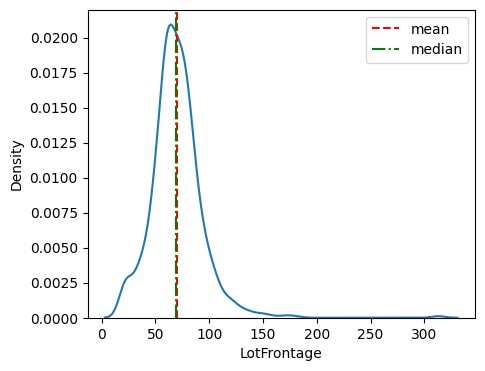

In [57]:
# set pyplote figure, and define the pre-defined size
plt.figure(figsize=(5,4))

# plot seaborn kdeplot for LotFrontage
sns.kdeplot(data=train_merged, x="LotFrontage")

# draw vertical line to describe the mean value
plt.axvline(x=train_merged.LotFrontage.mean(), color="r", linestyle="--", label="mean")

# draw vertical line to describe the median value
plt.axvline(x=train_merged.LotFrontage.median(), color="g", linestyle="-.", label="median")

# show the legend
plt.legend()

# show the whole graph
plt.show()

we can see that the median and the mean value is quiet near. But as the distribution is quiete skew to the right, we use **median** for the imputation of **LotFrontage** so that it could be robust to skewness

**Imputing Missing Value for LotFrontage** 

In [59]:
# fill missing value using median value
train_merged["LotFrontage"] = train_merged["LotFrontage"].fillna(train_merged.LotFrontage.median())

In [60]:
# sum all missing value in dataset and keep only columns with missing value > 0
missing = train_merged.isnull().sum()[train_merged.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_train = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(train)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missing value information
missing_train

,NaN_count,NaN_percentage
Electrical,1,0.000685


**Missing value imputation successful!**

next, as missing value in Electrical is only one observation. Then, we consider this as too small so we handle this by removing the observation that contain NA value.

**Drop NA in Electrical**

In [69]:
train_merged.dropna(subset=["Electrical"], inplace=True)

In [70]:
# sum all missing value in dataset and keep only columns with missing value > 0
missing = train_merged.isnull().sum()[train_merged.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage from the dataset
missing_train = pd.DataFrame({'NaN_count': missing, 'NaN_percentage': missing / len(train)}).sort_values(by = 'NaN_percentage', ascending = False)

# print the missin
missing_train

,NaN_count,NaN_percentage


**as we can see, no missing value left in our training dataset. Hence, missing value handling step is complete!**